## 1. Подготовка данных

In [25]:
from sklearn import tree
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from IPython.display import HTML
style = "<style>svg{width:50% !important;height:50% !important;}</style>"
HTML(style)

In [19]:
df_train = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_iris.csv')

In [20]:
df_train.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,130,7.4,2.8,6.1,1.9,2
1,7,5.0,3.4,1.5,0.2,0
2,11,4.8,3.4,1.6,0.2,0
3,142,5.8,2.7,5.1,1.9,2
4,109,7.2,3.6,6.1,2.5,2


In [21]:
df_test = pd.read_csv('https://stepik.org/media/attachments/course/4852/test_iris.csv')

In [22]:
# удаляем ненужные столбцы, и тот, который будем предсказывать

X_train = df_train.drop(['species', 'Unnamed: 0'], axis=1)
X_test = df_test.drop(['species', 'Unnamed: 0'], axis=1)

In [23]:
# создаем переменную, которую будем предсказывать в двух датасэтах

y_train = df_train.species
y_test = df_test.species

## 2. Обучение

In [26]:
np.random.seed(0)

In [29]:
# создаем новый датафрейм

score_data = pd.DataFrame()

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
max_depth_values = range(1,100)

In [43]:
# создаем цикл для поиска оптимальной глубины и сохраняем полученные данные в новую df - 'score_data'

for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
#     mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score], 
                                    'test_score': [test_score],
                                    })
    
    score_data = score_data.append(temp_score_data)

In [46]:
score_data.head()

,max_depth,train_score,test_score
0,1,0.70,0.60
0,2,0.97,0.94
0,3,0.99,0.94
0,4,1.00,0.92
0,5,1.00,0.92


In [47]:
score_data_long = pd.melt(score_data, id_vars='max_depth', value_vars=['train_score', 'test_score'],
                         var_name='set_type', value_name='score')

In [48]:
score_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.70
1,2,train_score,0.97
2,3,train_score,0.99
3,4,train_score,1.00
4,5,train_score,1.00


## 3. Визуализация

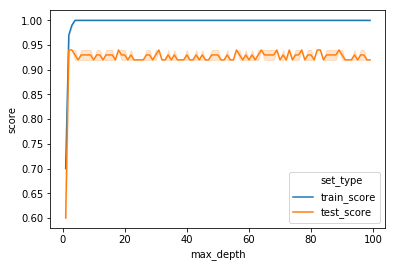

In [50]:
sns.lineplot(data=score_data_long, x='max_depth', y='score', hue='set_type')